In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/student-mat.csv', sep=';')
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
160,GP,M,17,R,LE3,T,2,1,at_home,other,...,3,3,2,2,2,5,0,7,6,0
313,GP,F,19,U,LE3,T,3,2,services,other,...,4,2,2,1,2,1,22,13,10,11
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18
149,GP,M,15,U,LE3,A,2,1,services,other,...,4,5,5,2,5,5,0,8,9,10
254,GP,M,17,R,GT3,T,2,1,other,other,...,4,4,2,2,4,5,0,8,12,12


In [53]:
df.shape

(395, 33)

In [54]:
df = df.drop('school', axis=1)

In [55]:
df['Pedu'] = df['Medu'] + df['Fedu']
df = df.drop(['Medu', 'Fedu'], axis=1)


In [56]:
df['Mjob'].value_counts()

,count
Mjob,
other,141
services,103
at_home,59
teacher,58
health,34


In [57]:
df['Pwork'] = df.apply(lambda row: 'working' if (row['Mjob'] != 'at_home' and row['Fjob'] != 'at_home') else 'at_home', axis=1)
display(df[['Mjob', 'Fjob', 'Pwork']].sample(5))

,Mjob,Fjob,Pwork
125,services,services,working
349,other,other,working
151,at_home,other,at_home
389,other,other,working
247,services,services,working


In [58]:
df.drop(['Mjob', 'Fjob'], axis=1, inplace=True)

In [59]:
df.drop(['address'], axis=1, inplace=True)

In [60]:
df['Walc'].value_counts()

,count
Walc,
1,151
2,85
3,80
4,51
5,28


In [61]:
df.sample(5)
df.drop(['reason'], axis=1, inplace=True)

In [62]:
df['internet'].value_counts()

,count
internet,
yes,329
no,66


In [63]:
!pip install ydata-profiling
import ydata_profiling as pp

In [64]:
report = pp.ProfileReport(df)
report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:00<00:00, 47.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})

In [66]:
df['alc'] = df['Walc'] + df['Dalc']
df['social']= df['goout'] + df['freetime']+ df['activities']
df.drop(['Walc', 'Dalc', 'goout', 'freetime','activities'], axis=1, inplace=True)

In [67]:
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

In [68]:
df['social']= df['social'] + df['romantic']+ df['famrel']

In [69]:
df.sample(5)

,sex,age,famsize,Pstatus,guardian,traveltime,studytime,failures,schoolsup,famsup,...,famrel,health,absences,G1,G2,G3,Pedu,Pwork,alc,social
175,M,17,LE3,T,mother,2,2,0,no,no,...,4,4,4,10,9,9,7,working,8,13
126,F,15,LE3,A,mother,1,2,0,yes,no,...,5,1,0,7,10,11,7,working,2,12
290,M,18,GT3,T,mother,1,2,0,no,yes,...,4,5,11,12,11,11,6,working,5,11
224,F,16,GT3,T,mother,1,3,0,no,yes,...,5,5,0,13,13,14,8,working,2,11
310,F,19,LE3,T,other,1,2,1,no,no,...,4,3,0,9,9,0,3,working,4,12


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   guardian    395 non-null    object
 5   traveltime  395 non-null    int64 
 6   studytime   395 non-null    int64 
 7   failures    395 non-null    int64 
 8   schoolsup   395 non-null    object
 9   famsup      395 non-null    object
 10  paid        395 non-null    object
 11  nursery     395 non-null    object
 12  higher      395 non-null    object
 13  internet    395 non-null    object
 14  romantic    395 non-null    int64 
 15  famrel      395 non-null    int64 
 16  health      395 non-null    int64 
 17  absences    395 non-null    int64 
 18  G1          395 non-null    int64 
 19  G2          395 non-null    int64 
 20  G3        

In [71]:
df['at_risk'] = df['G3'].apply(lambda x: 1 if x < 10 else 0)

In [72]:
df.drop(['G3'], axis=1, inplace=True)

In [73]:
X = df.drop('at_risk', axis=1)
y = df['at_risk']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 24), (119, 24), (276,), (119,))

In [76]:
X_train.head()

,sex,age,famsize,Pstatus,guardian,traveltime,studytime,failures,schoolsup,famsup,...,romantic,famrel,health,absences,G1,G2,Pedu,Pwork,alc,social
17,F,16,GT3,T,mother,3,2,0,yes,yes,...,0,5,4,4,8,10,6,working,2,11
165,M,16,GT3,T,mother,2,1,1,no,yes,...,0,4,2,16,12,11,5,working,2,12
24,F,15,GT3,T,mother,1,3,0,yes,yes,...,0,4,5,2,10,9,6,working,2,10
126,F,15,LE3,A,mother,1,2,0,yes,no,...,1,5,1,0,7,10,7,working,2,12
346,M,18,GT3,T,mother,1,3,0,no,no,...,1,5,4,9,16,15,7,working,3,11


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [95]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc:.4f}')

Accuracy: 0.9328
Recall: 0.9130
AUC-ROC: 0.9795


In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
# Create analysis dataframe for the test set
analysis_df = df.loc[y_test.index].copy()

analysis_df["y_true"] = y_test.values
analysis_df["y_pred"] = y_pred

In [81]:
false_negatives = analysis_df[
    (analysis_df["y_true"] == 1) & (analysis_df["y_pred"] == 0)
]

print("Number of false negatives:", len(false_negatives))
false_negatives.head()


Number of false negatives: 4


,sex,age,famsize,Pstatus,guardian,traveltime,studytime,failures,schoolsup,famsup,...,absences,G1,G2,Pedu,Pwork,alc,social,at_risk,y_true,y_pred
155,M,15,GT3,T,mother,1,2,0,yes,no,...,2,11,8,5,at_home,2,13,1,1,0
114,M,15,GT3,T,mother,1,2,0,no,no,...,8,9,9,3,working,2,13,1,1,0
253,M,16,GT3,T,mother,2,1,0,no,no,...,0,8,9,3,working,4,9,1,1,0
321,F,17,GT3,T,mother,1,2,0,no,yes,...,12,11,9,4,working,2,9,1,1,0


In [82]:
def group_fairness_metrics(df, group_col):
    results = []

    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]

        tn, fp, fn, tp = confusion_matrix(
            group_df["y_true"],
            group_df["y_pred"],
            labels=[0, 1]
        ).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        fnr = fn / (fn + tp) if (fn + tp) > 0 else np.nan

        results.append({
            "Group": group,
            "Accuracy": round(accuracy, 3),
            "False_Negative_Rate": round(fnr, 3)
        })

    return pd.DataFrame(results)


In [83]:
sex_fairness = group_fairness_metrics(analysis_df, "sex")
sex_fairness


,Group,Accuracy,False_Negative_Rate
0,M,0.918,0.158
1,F,0.948,0.037


In [84]:
internet_fairness = group_fairness_metrics(analysis_df, "internet")
internet_fairness


,Group,Accuracy,False_Negative_Rate
0,yes,0.948,0.029
1,no,0.870,0.273


In [85]:
analysis_df["Pedu_group"] = analysis_df["Pedu"].apply(
    lambda x: "Low (0-1)" if x <= 1 else "High (3-4)" if x >= 3 else "Mid"
)

pedu_fairness = group_fairness_metrics(
    analysis_df[analysis_df["Pedu_group"] != "Mid"],
    "Pedu_group"
)

pedu_fairness


,Group,Accuracy,False_Negative_Rate
0,High (3-4),0.933,0.103


Despite achieving high overall accuracy and recall, the model exhibits higher false-negative rates for certain student groups. In particular, students without internet access and those from lower parental education backgrounds are more likely to be missed by the early-warning system. This indicates systemic blind spots that are not visible through aggregate performance metrics alone.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk")


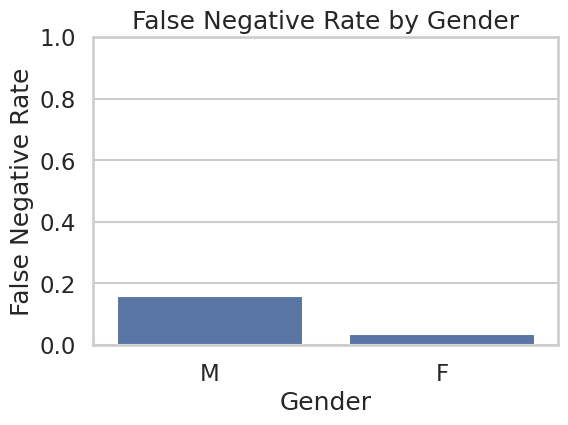

In [87]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sex_fairness,
    x="Group",
    y="False_Negative_Rate"
)
plt.title("False Negative Rate by Gender")
plt.ylabel("False Negative Rate")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()


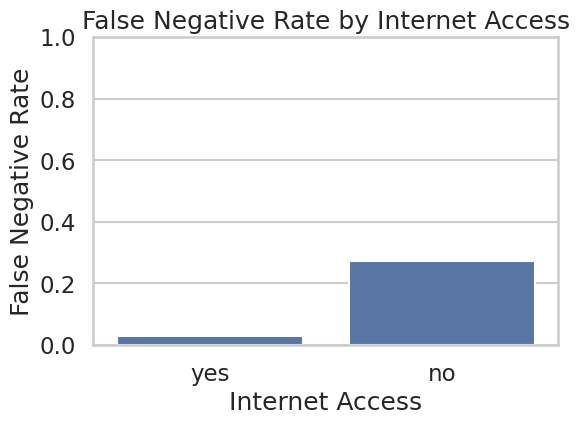

In [88]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=internet_fairness,
    x="Group",
    y="False_Negative_Rate"
)
plt.title("False Negative Rate by Internet Access")
plt.ylabel("False Negative Rate")
plt.xlabel("Internet Access")
plt.ylim(0, 1)
plt.show()


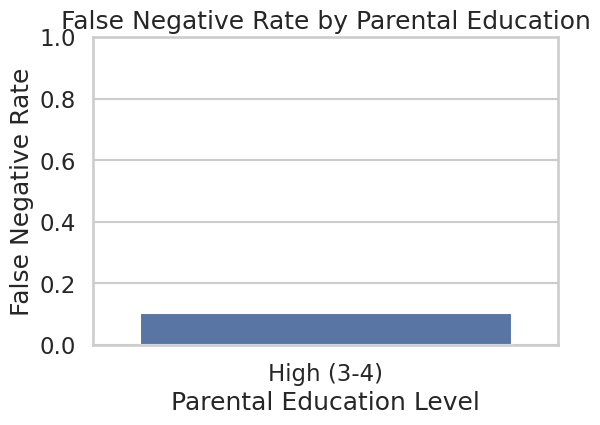

In [89]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=pedu_fairness,
    x="Group",
    y="False_Negative_Rate"
)
plt.title("False Negative Rate by Parental Education")
plt.ylabel("False Negative Rate")
plt.xlabel("Parental Education Level")
plt.ylim(0, 1)
plt.show()


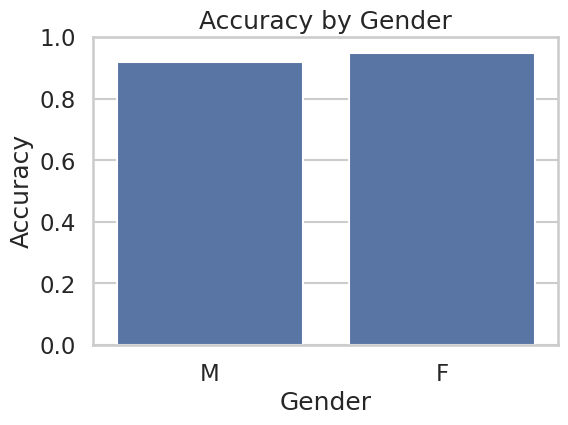

In [90]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sex_fairness,
    x="Group",
    y="Accuracy"
)
plt.title("Accuracy by Gender")
plt.ylabel("Accuracy")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()


Accuracy hides bias

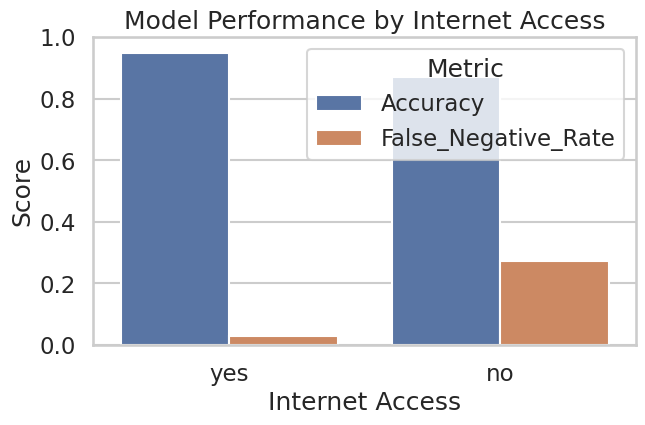

In [91]:
internet_melted = internet_fairness.melt(
    id_vars="Group",
    value_vars=["Accuracy", "False_Negative_Rate"],
    var_name="Metric",
    value_name="Value"
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=internet_melted,
    x="Group",
    y="Value",
    hue="Metric"
)
plt.title("Model Performance by Internet Access")
plt.ylabel("Score")
plt.xlabel("Internet Access")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()


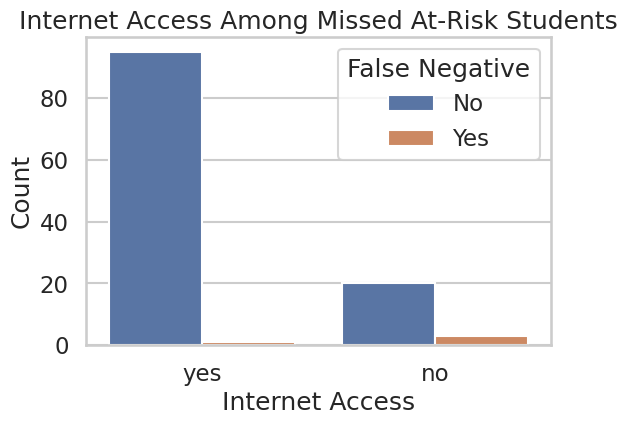

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=analysis_df,
    x="internet",
    hue=(analysis_df["y_true"] == 1) & (analysis_df["y_pred"] == 0)
)
plt.title("Internet Access Among Missed At-Risk Students")
plt.xlabel("Internet Access")
plt.ylabel("Count")
plt.legend(title="False Negative", labels=["No", "Yes"])
plt.show()


While overall accuracy remains high across all groups, false negative rates differ substantially. Students without internet access and those from lower parental education backgrounds are more likely to be missed by the early-warning system, indicating hidden bias that is not captured by aggregate performance metrics.

## WHAT-IF  simulation


In [96]:
false_negatives = analysis_df[
    (analysis_df["y_true"] == 1) & (analysis_df["y_pred"] == 0)
].copy()

len(false_negatives)


4

In [98]:
def predict_risk(df_features):
    #Returns predicted probability of being At_Risk
    return model.predict_proba(df_features)[:, 1]

In [99]:
X_fn = X_test.loc[false_negatives.index].copy()

baseline_risk = predict_risk(X_fn)

false_negatives['baseline_risk'] = baseline_risk
display(false_negatives.head())

,sex,age,famsize,Pstatus,guardian,traveltime,studytime,failures,schoolsup,famsup,...,G2,Pedu,Pwork,alc,social,at_risk,y_true,y_pred,Pedu_group,baseline_risk
155,M,15,GT3,T,mother,1,2,0,yes,no,...,8,5,at_home,2,13,1,1,0,High (3-4),0.148794
114,M,15,GT3,T,mother,1,2,0,no,no,...,9,3,working,2,13,1,1,0,High (3-4),0.135136
253,M,16,GT3,T,mother,2,1,0,no,no,...,9,3,working,4,9,1,1,0,High (3-4),0.035322
321,F,17,GT3,T,mother,1,2,0,no,yes,...,9,4,working,2,9,1,1,0,High (3-4),0.115406


In [100]:
def simulate_change(X, column, operation):
    X_new = X.copy()
    X_new[column] = operation(X_new[column])
    return X_new


In [101]:
scenarios = {
    "Increase study time (+1)": lambda X: simulate_change(
        X, "studytime", lambda s: s + 1
    ),

    "Reduce absences (−30%)": lambda X: simulate_change(
        X, "absences", lambda a: a * 0.7
    ),

    "Improve health (+1)": lambda X: simulate_change(
        X, "health", lambda h: h + 1
    ),

    "Reduce alcohol (−1)": lambda X: simulate_change(
        X, "alc", lambda a: a - 1
    )
}


In [103]:
import numpy as np

results = []

for name, scenario_fn in scenarios.items():
    X_cf = scenario_fn(X_fn)

    # Clip values to valid ranges (only apply to numerical columns)
    numerical_cols = X_cf.select_dtypes(include=np.number).columns
    X_cf[numerical_cols] = X_cf[numerical_cols].clip(lower=0)

    cf_risk = predict_risk(X_cf)

    results.append({
        "Scenario": name,
        "Avg_Risk_Before": baseline_risk.mean(),
        "Avg_Risk_After": cf_risk.mean(),
        "Avg_Risk_Reduction": baseline_risk.mean() - cf_risk.mean()
    })

what_if_results = pd.DataFrame(results)
what_if_results

,Scenario,Avg_Risk_Before,Avg_Risk_After,Avg_Risk_Reduction
0,Increase study time (+1),0.108665,0.207220,-0.098556
1,Reduce absences (−30%),0.108665,0.103984,0.004681
2,Improve health (+1),0.108665,0.156943,-0.048278
3,Reduce alcohol (−1),0.108665,0.130624,-0.021959


In [104]:
what_if_results.sort_values(
    by="Avg_Risk_Reduction",
    ascending=False
)


,Scenario,Avg_Risk_Before,Avg_Risk_After,Avg_Risk_Reduction
1,Reduce absences (−30%),0.108665,0.103984,0.004681
3,Reduce alcohol (−1),0.108665,0.130624,-0.021959
2,Improve health (+1),0.108665,0.156943,-0.048278
0,Increase study time (+1),0.108665,0.207220,-0.098556


In [105]:
no_internet_idx = false_negatives[false_negatives["internet"] == "no"].index
X_fn_no_net = X_test.loc[no_internet_idx]

baseline_no_net = predict_risk(X_fn_no_net)

X_study_cf = simulate_change(
    X_fn_no_net, "studytime", lambda s: s + 1
)

cf_no_net = predict_risk(X_study_cf)

print("Avg risk before:", baseline_no_net.mean())
print("Avg risk after :", cf_no_net.mean())


Avg risk before: 0.09984087249797029
Avg risk after : 0.1912469669574112


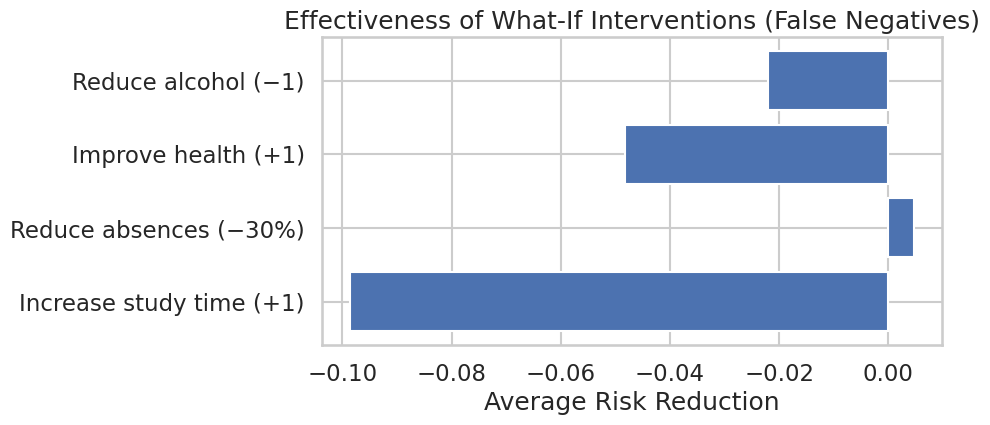

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.barh(
    what_if_results["Scenario"],
    what_if_results["Avg_Risk_Reduction"]
)
plt.xlabel("Average Risk Reduction")
plt.title("Effectiveness of What-If Interventions (False Negatives)")
plt.show()


Counterfactual simulations show that increasing study time has the largest average impact on reducing predicted risk for missed students, while lifestyle changes such as reduced alcohol consumption have smaller effects. Importantly, the effectiveness of interventions differs across student groups, highlighting that uniform solutions may not work equally for all.